In [71]:
print("all ok")

all ok


In [72]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [73]:
model="deepseek-r1-distill-llama-70b"

### Load the model

In [74]:
from langchain_groq import ChatGroq


In [75]:
llm=ChatGroq(model_name=model)

In [76]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? ðŸ˜Š', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.083151969, 'prompt_time': 5.5949e-05, 'queue_time': 0.205101526, 'total_time': 0.083207918}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--8e088080-6826-49e8-a0f0-61b9ae63d290-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [77]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? ðŸ˜Š


In [78]:
# import operator
# from typing import List
# from langgraph.graph.message import add_messages
# from pydantic import BaseModel , Field
# from typing import TypedDict, Annotated, Sequence
# from langchain_core.messages import BaseMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [79]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [80]:
HumanMessage("hi how are you?")

HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={})

In [81]:
HumanMessage(["hi how are you?"])

HumanMessage(content=['hi how are you?'], additional_kwargs={}, response_metadata={})

### this code is only for the testing

In [82]:

state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? ðŸ˜Š", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.193542433, 'prompt_time': 0.000187937, 'queue_time': 0.205353018, 'total_time': 0.19373037}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e4bdec2a-f325-4eeb-9f2b-202610acebbc-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [83]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

## Design a simple workflow without tool calling/

In [84]:
workflow=StateGraph(MessagesState)

In [85]:
workflow.add_node("mybot",call_model)

In [86]:
workflow.add_edge(START,"mybot")

In [87]:
workflow.add_edge("mybot",END)

In [88]:
app=workflow.compile()

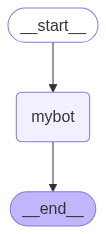

In [89]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [90]:
input={"messages":["hi hello how are you?"]}

In [91]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='15c83a5d-c19f-46c2-805a-f535620ee3ee'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? ðŸ˜Š", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.214454111, 'prompt_time': 0.000203247, 'queue_time': 0.202906642, 'total_time': 0.214657358}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--343e3fbb-3bae-4459-bb63-b1e6662d9c60-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [92]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? ðŸ˜Š", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.197990785, 'prompt_time': 0.00050989, 'queue_time': 0.202602284, 'total_time': 0.198500675}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--46fde45f-9e94-4e5a-ac6d-b68034b02a5d-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




### this is a workflow with tool calling

In [93]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

## testing a tool

In [94]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [95]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [96]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BF7165B2E0>)

In [97]:
llm.invoke("what is a weather in delhi?")

AIMessage(content="<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a humid subtropical climate with extreme variations in temperature throughout the year. Here's a breakdown of the typical weather patterns in Delhi:\n\n1. **Summer (March to June)**: Extremely hot with temperatures often reaching 45Â°C (113Â°F) or higher.\n2. **Monsoon (July to September)**: Hot and humid with frequent rain showers.\n3. **Winter (December to February)**: Cool to cold with temperatures sometimes dropping to 4Â°C (39Â°F).\n\nFor the most accurate and current weather information, please check a reliable weather forecasting service like [AccuWeather](https://www.accuweather.com) or [Weather.com](https://www.weather.com).", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 166, 'prompt_tokens': 11, 'total_tokens': 177, 'completion_time': 0.603636364, 'prompt_time': 0.000271505, 'queue_ti

### Binding a tool to the LLM

### Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [98]:
tools=[search]

In [99]:
llm_with_tool=llm.bind_tools(tools)

### testig my llm_with_tool

In [100]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [101]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z42270yrw', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 135, 'prompt_tokens': 133, 'total_tokens': 268, 'completion_time': 0.651055117, 'prompt_time': 0.008563408, 'queue_time': 0.208420361, 'total_time': 0.659618525}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--914ef741-6d7f-4560-9ef8-d746d171e3be-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'z42270yrw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 135, 'total_tokens': 268})

In [102]:
response.content

''

In [103]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'z42270yrw',
  'type': 'tool_call'}]

In [104]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

### Testing code

In [105]:
input={"messages":["what is a weather in delhi?"]}

In [106]:
response=call_model(input)

In [107]:
response["messages"][-1].content

''

In [108]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'vn27dhqgk',
  'type': 'tool_call'}]

### here my router function

#### now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [109]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [110]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BF7165B2E0>)]

In [111]:

tool_node=ToolNode(tools)

In [112]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BF7165B2E0>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [113]:
workflow2=StateGraph(MessagesState)

In [114]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

In [115]:
workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [116]:
app2=workflow2.compile()

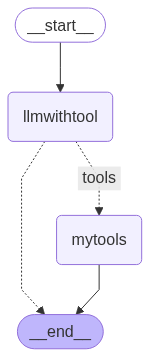

In [117]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [118]:
app2.invoke({"messages":["what is a weather in bengraluru?"]})

{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='cf1869fb-7cfe-4e5b-8d2d-17e771d7338e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vj76gbtbz', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 135, 'total_tokens': 257, 'completion_time': 0.462892788, 'prompt_time': 0.008668036, 'queue_time': 0.20380472100000002, 'total_time': 0.471560824}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a6b7f12-c98c-4674-a0e0-c28ac23c5e81-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Bengaluru'}, 'id': 'vj76gbtbz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 135, 'output_tokens': 122, 'total_tokens': 257}),
  ToolMessage(content='the temp is 25 degree and

In [119]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='e19968d9-4f89-4c54-b643-1fe3f03608e3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qqhfvcfpe', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 133, 'total_tokens': 226, 'completion_time': 0.398675351, 'prompt_time': 0.008599817, 'queue_time': 0.20311401599999998, 'total_time': 0.407275168}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f48d0b80-6eb6-4d45-bb75-3f27c1221b8e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'qqhfvcfpe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 93, 'total_tokens': 226}),
  ToolMessage(content='the temp is 45 degree and sunny', name='

### use good resoning based model

In [120]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='4b4467fe-d92c-4f4d-858c-3a67b86f7117'),
  AIMessage(content="Hello! I'm here to help with your queries. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 130, 'total_tokens': 261, 'completion_time': 0.640205491, 'prompt_time': 0.008325412, 'queue_time': 0.205442656, 'total_time': 0.648530903}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--9871c70f-2d31-492d-905e-9910ab577620-0', usage_metadata={'input_tokens': 130, 'output_tokens': 131, 'total_tokens': 261})]}